In [144]:
import string
import numpy as np
import matplotlib.pyplot as plt
import os

In [145]:
def read_accuracy(dirs):
    student_accuracy = np.zeros((5, 100))
    benchmark_accuracy_train = np.zeros((2, 100))
    benchmark_accuracy_test = np.zeros((2, 100))
    teacher_accuracy = np.zeros((5, 100))

    for index in range(5):
        student_file = open(dirs + 'test' + str(index + 1) + '/file_student.txt')
        benchmark_file = open(dirs + 'test' + str(index + 1) + '/file_benchmark.txt')
        teacher_file = open(dirs + 'test' + str(index + 1) + '/file_teacher.txt')
        line = student_file.readlines()
        student_accuracy[index] = [float(x) for x in line[3].replace('[', '').replace(']', '').replace('\n', '').split(',')]

        line = benchmark_file.readlines()
        if index < 2:
            benchmark_accuracy_train[index] = [float(x) for x in line[1].replace('[', '').replace(']', '').replace('\n', '').split(',')]
            benchmark_accuracy_test[index] = [float(x) for x in line[3].replace('[', '').replace(']', '').replace('\n', '').split(',')]

        line = teacher_file.readlines()
        teacher_accuracy[index] = [float(x) for x in line[3].replace('[', '').replace(']', '').replace('\n', '').split(',')]

    return np.mean(teacher_accuracy, axis=0), np.mean(student_accuracy, axis=0), np.mean(benchmark_accuracy_train, axis=0), np.mean(benchmark_accuracy_test, axis=0)


In [146]:
def read_setting(dirs):
    lambda_mean = np.zeros(5)
    precision_add_data = np.zeros((5, 10, 10))  # file_index, iteration, class
    number_add_data = np.zeros((5, 10, 10))
    
    for index in range(5):
        precision_file = open(dirs + 'test' + str(index + 1) + '/file_additional_data.txt')
        line = precision_file.readlines()       
        lambda_mean[index] = float(line[-1].split(':')[1])
        for iteration in range(10):
            precision_add_data[index, iteration, :] = [float(x) for x in line[iteration*4+1].replace( \
                                                    '[', '').replace(']', '').replace('\n', '').split(',')]
            number_add_data[index, iteration, :] = [float(x) for x in line[iteration*4+3].replace( \
                                                    '[', '').replace(']', '').replace('\n', '').split(',')]
    
    np.set_printoptions(precision=3)
    np.set_printoptions(suppress=True)
    print('Average of lambda: %.3f'%np.mean(lambda_mean))
    print('Precision of additional data. (row - iteraion, column - class)')
    print(np.mean(precision_add_data, axis=0))
    print('Number of additional data. (row - iteraion, column - class)')
    print(np.mean(number_add_data, axis=0).astype(int))
    

In [147]:
def plot_accuracy(noise_level, additional_data_size, learning_rate):
    dirs = 'noise_' + str(noise_level) + '_iteration_10_cleansize_50_add_' \
    + str(additional_data_size) + '_lr_' + str(learning_rate) + '/'
    t, s, b_train, b_test = read_accuracy(dirs)
    read_setting(dirs)    
    
    data = np.zeros((4, 2))
    data[0, :] = np.max(t), t[-1]
    data[1, :] = np.max(s), s[-1]
    data[2, :] = np.max(b_train), b_train[-1]
    data[3, :] = np.max(b_test), b_test[-1]
    
    print(data)
    
    plt.figure(1) # 创建图表1
    plt.plot(b_train, '--', label='benchmark, training')
    plt.plot(b_test, label='benchmark, test')
    plt.plot(t, label='teacher, test')
    plt.plot(s, label='student, test')
    plt.legend()
    plt.grid()
    plt.ylim(0,1)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('noise: %.1f, additional data per class: %d, learning rate: %.4f'%(noise_level, additional_data_size, learning_rate))
    
    dirs = 'figure/' + dirs
    if not os.path.exists(dirs):
        os.makedirs(dirs)
    plt.savefig(dirs + 'accuracy.png')
    plt.show()

Average of lambda: 0.815
Precision of additional data. (row - iteraion, column - class)
[[0.    0.293 0.    0.    0.    0.    0.2   0.    0.2   0.518]
 [0.138 0.482 0.    0.396 0.067 0.066 0.    0.585 0.2   0.572]
 [0.216 0.389 0.621 0.724 0.466 0.202 0.727 0.396 0.284 0.504]
 [0.19  0.324 0.654 0.678 0.64  0.391 0.518 0.348 0.243 0.472]
 [0.265 0.345 0.624 0.648 0.696 0.459 0.441 0.361 0.304 0.472]
 [0.331 0.355 0.639 0.676 0.654 0.497 0.38  0.395 0.316 0.481]
 [0.361 0.352 0.662 0.686 0.618 0.517 0.414 0.405 0.331 0.483]
 [0.395 0.342 0.696 0.706 0.63  0.524 0.459 0.42  0.337 0.487]
 [0.394 0.343 0.723 0.717 0.659 0.521 0.474 0.412 0.35  0.496]
 [0.391 0.341 0.732 0.719 0.685 0.519 0.481 0.418 0.363 0.499]]
Number of additional data. (row - iteraion, column - class)
[[   0    1    0    0    0    0    0    0    0   12]
 [   8  217    0   10    0   23    0  161    1  329]
 [ 138  363   39  118   10   46   13  419  281  629]
 [ 216  785  204  392   60  437   71  781  430  872]
 [ 647 11

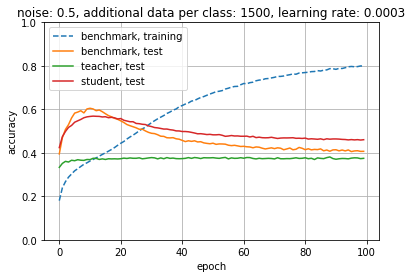

In [148]:
dirs = 'noise_0.5_iteration_10_cleansize_50_add_1500_lr_0.0003/'
noise_level = 0.5
additional_data_size = 1500
learning_rate = 0.0003

# create record files
plot_accuracy(noise_level, additional_data_size, learning_rate)

Average of lambda: 0.859
Precision of additional data. (row - iteraion, column - class)
[[0.136 0.596 0.    0.558 0.4   0.1   0.388 0.185 0.375 0.489]
 [0.393 0.481 0.783 0.72  0.772 0.605 0.618 0.503 0.424 0.547]
 [0.436 0.492 0.747 0.725 0.803 0.617 0.565 0.508 0.446 0.552]
 [0.504 0.495 0.78  0.75  0.844 0.637 0.648 0.551 0.481 0.574]
 [0.556 0.511 0.806 0.76  0.864 0.663 0.667 0.627 0.516 0.587]
 [0.577 0.544 0.825 0.767 0.885 0.681 0.711 0.666 0.549 0.608]
 [0.598 0.62  0.837 0.788 0.875 0.72  0.772 0.704 0.563 0.64 ]
 [0.613 0.643 0.841 0.799 0.863 0.738 0.801 0.733 0.594 0.652]
 [0.62  0.738 0.851 0.801 0.876 0.748 0.821 0.758 0.6   0.716]
 [0.642 0.821 0.855 0.809 0.874 0.761 0.836 0.788 0.624 0.816]]
Number of additional data. (row - iteraion, column - class)
[[   3  524    0  313    1    2    3  206   13  652]
 [ 843 1500  896 1431  425 1255  253 1276 1289 1413]
 [1495 1500 1414 1500 1335 1500 1387 1500 1500 1500]
 [1500 1500 1500 1500 1500 1500 1500 1500 1500 1500]
 [1500 15

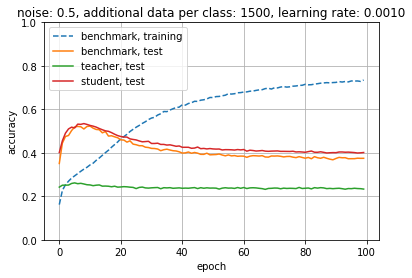

In [149]:
dirs = 'noise_0.5_iteration_10_cleansize_50_add_1500_lr_0.001/'
noise_level = 0.5
additional_data_size = 1500
learning_rate = 0.001

# create record files
plot_accuracy(noise_level, additional_data_size, learning_rate)

Average of lambda: 0.814
Precision of additional data. (row - iteraion, column - class)
[[0.    0.367 0.    0.    0.    0.    0.2   0.    0.2   0.496]
 [0.15  0.391 0.167 0.507 0.35  0.159 0.    0.387 0.    0.353]
 [0.224 0.355 0.407 0.648 0.473 0.425 0.488 0.388 0.47  0.488]
 [0.286 0.347 0.591 0.671 0.705 0.393 0.497 0.355 0.237 0.472]
 [0.343 0.329 0.542 0.657 0.614 0.423 0.401 0.364 0.238 0.458]
 [0.377 0.328 0.592 0.674 0.58  0.451 0.374 0.37  0.255 0.462]
 [0.397 0.32  0.615 0.681 0.589 0.484 0.416 0.357 0.27  0.466]
 [0.395 0.317 0.635 0.687 0.605 0.495 0.422 0.356 0.287 0.467]
 [0.397 0.319 0.651 0.688 0.623 0.496 0.431 0.363 0.287 0.46 ]
 [0.417 0.32  0.662 0.695 0.647 0.502 0.447 0.357 0.284 0.469]]
Number of additional data. (row - iteraion, column - class)
[[   0    1    0    0    0    0    0    0    0   18]
 [   8  116    1   19    2   16    0  172    1  280]
 [ 136  547   14  156    4  157   25  466  122  597]
 [ 393  751  176  423   31  446   93  668  365  793]
 [ 772  9

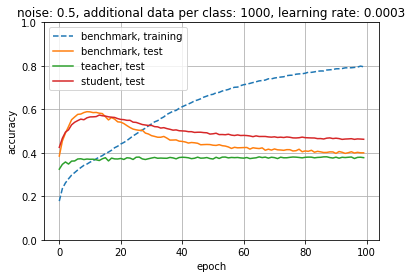

In [150]:
dirs = 'noise_0.5_iteration_10_cleansize_50_add_1000_lr_0.0003/'
noise_level = 0.5
additional_data_size = 1000
learning_rate = 0.0003

# create record files
plot_accuracy(noise_level, additional_data_size, learning_rate)

Average of lambda: 0.883
Precision of additional data. (row - iteraion, column - class)
[[0.05  0.303 0.    0.    0.    0.    0.    0.047 0.    0.   ]
 [0.134 0.455 0.    0.279 0.    0.23  0.    0.246 0.158 0.666]
 [0.351 0.418 0.622 0.674 0.33  0.371 0.295 0.387 0.274 0.53 ]
 [0.255 0.376 0.654 0.644 0.848 0.455 0.451 0.356 0.288 0.5  ]
 [0.325 0.363 0.631 0.642 0.7   0.487 0.44  0.364 0.29  0.504]
 [0.318 0.377 0.635 0.655 0.694 0.504 0.405 0.385 0.309 0.5  ]
 [0.353 0.372 0.663 0.683 0.669 0.504 0.435 0.378 0.335 0.509]
 [0.363 0.358 0.692 0.687 0.67  0.507 0.462 0.371 0.357 0.514]
 [0.391 0.353 0.705 0.692 0.688 0.516 0.488 0.372 0.362 0.517]
 [0.396 0.348 0.712 0.698 0.719 0.522 0.496 0.367 0.357 0.52 ]]
Number of additional data. (row - iteraion, column - class)
[[   0  100    0    0    0    0    0    3    0    0]
 [  66  392    0   13    0   36    0   87   52  319]
 [ 125  763  104  115    4  384   25  513  103  782]
 [ 377 1034  191  287   49  915  209  816  363 1127]
 [ 661 12

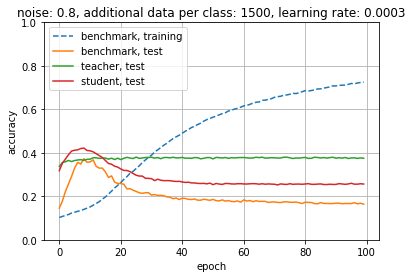

In [151]:
dirs = 'noise_0.8_iteration_10_cleansize_50_add_1500_lr_0.0003/'
noise_level = 0.8
additional_data_size = 1500
learning_rate = 0.0003

# create record files
plot_accuracy(noise_level, additional_data_size, learning_rate)

Average of lambda: 0.883
Precision of additional data. (row - iteraion, column - class)
[[0.022 0.101 0.    0.    0.    0.    0.    0.062 0.    0.   ]
 [0.124 0.492 0.267 0.216 0.    0.216 0.    0.117 0.314 0.562]
 [0.248 0.39  0.64  0.504 0.374 0.329 0.607 0.315 0.204 0.554]
 [0.273 0.358 0.648 0.558 0.503 0.367 0.453 0.296 0.281 0.51 ]
 [0.283 0.335 0.629 0.641 0.759 0.398 0.377 0.289 0.252 0.49 ]
 [0.308 0.329 0.654 0.644 0.718 0.447 0.416 0.284 0.264 0.488]
 [0.32  0.333 0.676 0.651 0.674 0.464 0.434 0.277 0.275 0.483]
 [0.34  0.315 0.68  0.658 0.696 0.474 0.442 0.285 0.285 0.481]
 [0.345 0.314 0.693 0.662 0.705 0.471 0.447 0.281 0.291 0.502]
 [0.35  0.313 0.703 0.67  0.728 0.476 0.458 0.281 0.288 0.493]]
Number of additional data. (row - iteraion, column - class)
[[   1   76    0    0    0    0    0    2    0    0]
 [  24  329    2    5    0   19    0   10    2  374]
 [ 211  480   25   50   35  175   95  298   88  593]
 [ 473  875  321  305   46  330  138  603  299  804]
 [ 654  9

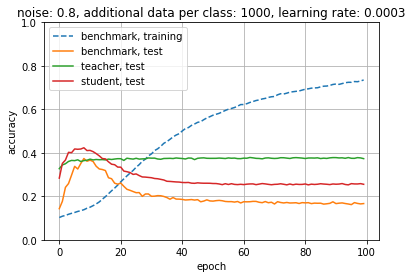

In [152]:
dirs = 'noise_0.8_iteration_10_cleansize_50_add_1000_lr_0.0003/'
noise_level = 0.8
additional_data_size = 1000
learning_rate = 0.0003

# create record files
plot_accuracy(noise_level, additional_data_size, learning_rate)

Average of lambda: 0.891
Precision of additional data. (row - iteraion, column - class)
[[0.177 0.355 0.15  0.597 0.    0.176 0.16  0.38  0.261 0.627]
 [0.417 0.509 0.721 0.697 0.767 0.568 0.613 0.476 0.444 0.513]
 [0.452 0.463 0.724 0.707 0.762 0.578 0.66  0.467 0.44  0.529]
 [0.459 0.434 0.747 0.711 0.794 0.595 0.706 0.499 0.459 0.556]
 [0.478 0.422 0.756 0.718 0.814 0.609 0.689 0.533 0.451 0.582]
 [0.505 0.436 0.765 0.742 0.84  0.616 0.693 0.579 0.456 0.604]
 [0.564 0.438 0.778 0.76  0.835 0.651 0.712 0.612 0.456 0.638]
 [0.648 0.433 0.779 0.763 0.842 0.66  0.723 0.624 0.578 0.653]
 [0.699 0.434 0.816 0.77  0.845 0.654 0.773 0.678 0.58  0.661]
 [0.726 0.436 0.823 0.807 0.849 0.7   0.838 0.704 0.618 0.679]]
Number of additional data. (row - iteraion, column - class)
[[  10  491    7   91    0   10    1  320   48  283]
 [ 577 1000  651 1000  286  931  463  979  948  911]
 [ 898 1000 1000 1000  968 1000 1000 1000 1000 1000]
 [ 968 1000 1000 1000 1000 1000 1000 1000 1000 1000]
 [1000 10

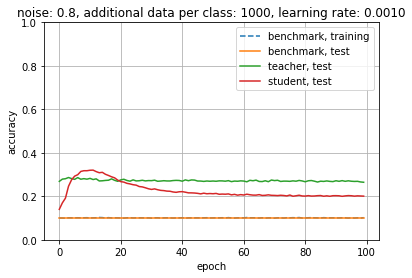

In [153]:
dirs = 'noise_0.8_iteration_10_cleansize_50_add_1000_lr_0.001/'
noise_level = 0.8
additional_data_size = 1000
learning_rate = 0.001

# create record files
plot_accuracy(noise_level, additional_data_size, learning_rate)